In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_set=pd.read_csv("C:/Users/mohamed ismail/Desktop/GP And Data/T M G Holding.csv",index_col=1)

In [3]:
training_set.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
1/2/2013 0:00,EGS691S1C011,4819957,22287042.43,927,4.48,4.72,4.46,4.62
1/3/2013 0:00,EGS691S1C011,3627545,17134786.61,945,4.65,4.76,4.63,4.72
1/6/2013 0:00,EGS691S1C011,2607806,12245969.99,607,4.73,4.76,4.64,4.70
1/8/2013 0:00,EGS691S1C011,5684753,26984291.44,866,4.69,4.84,4.60,4.75
1/9/2013 0:00,EGS691S1C011,2980833,14233038.27,648,4.81,4.85,4.73,4.77


In [4]:
training_set.tail()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
12/25/2017 0:00,EGS691S1C011,2550914,24808931.74,332,9.70,9.83,9.55,9.73
12/26/2017 0:00,EGS691S1C011,952893,9123532.62,271,9.70,9.70,9.51,9.57
12/27/2017 0:00,EGS691S1C011,2670503,25737256.31,425,9.64,9.76,9.54,9.64
12/28/2017 0:00,EGS691S1C011,4395442,43235515.01,521,9.60,9.92,9.60,9.84
12/31/2017 0:00,EGS691S1C011,876400,8591940.29,202,9.75,9.91,9.70,9.80


In [5]:
TMG_Holding=training_set[:1198]
TMG_Holding.tail()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
11/22/2017 0:00,EGS691S1C011,4489144,4.208201e+07,564,9.24,9.44,9.24,9.37
11/23/2017 0:00,EGS691S1C011,6627773,6.302454e+07,772,9.45,9.60,9.40,9.51
11/26/2017 0:00,EGS691S1C011,4546868,4.388733e+07,577,9.50,9.75,9.46,9.65
11/27/2017 0:00,EGS691S1C011,5265893,5.096001e+07,541,9.70,9.75,9.52,9.68
11/28/2017 0:00,EGS691S1C011,16500872,1.638336e+08,1478,9.73,10.03,9.66,9.93


In [6]:
training_set=TMG_Holding.iloc[:,7:8].values

In [7]:
training_set

array([[ 4.62],
       [ 4.72],
       [ 4.7 ],
       ..., 
       [ 9.65],
       [ 9.68],
       [ 9.93]])

In [8]:
len(training_set)

1198

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sc=MinMaxScaler()
training_set=sc.fit_transform(training_set)

In [11]:
X_train=training_set[0:1197]

In [12]:
y_train=training_set[1:1198]

In [13]:
len(X_train),len(y_train)

(1197, 1197)

In [14]:
X_train=np.reshape(X_train,(1197,1,1))

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [16]:
regressor=Sequential()

In [17]:
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))

In [18]:
regressor.add(Dense(units=1))

In [19]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
regressor.fit(X_train,y_train,batch_size=32,epochs=150)

Epoch 1/150
1197/1197 [==============================] - 2s 2ms/step - loss: 0.4883
Epoch 2/150
1197/1197 [==============================] - 0s 114us/step - loss: 0.3759
Epoch 3/150
1197/1197 [==============================] - 0s 130us/step - loss: 0.2869
Epoch 4/150
1197/1197 [==============================] - 0s 133us/step - loss: 0.2183
Epoch 5/150
1197/1197 [==============================] - 0s 125us/step - loss: 0.1664
Epoch 6/150
1197/1197 [==============================] - 0s 130us/step - loss: 0.1285
Epoch 7/150
1197/1197 [==============================] - 0s 127us/step - loss: 0.1015
Epoch 8/150
1197/1197 [==============================] - 0s 130us/step - loss: 0.0831
Epoch 9/150
1197/1197 [==============================] - 0s 115us/step - loss: 0.0711
Epoch 10/150
1197/1197 [==============================] - 0s 95us/step - loss: 0.0634
Epoch 11/150
1197/1197 [==============================] - 0s 98us/step - loss: 0.0586
Epoch 12/150
1197/1197 [==============================] 

1197/1197 [==============================] - 0s 103us/step - loss: 5.8072e-04
Epoch 96/150
1197/1197 [==============================] - 0s 92us/step - loss: 5.4154e-04
Epoch 97/150
1197/1197 [==============================] - 0s 107us/step - loss: 5.1020e-04
Epoch 98/150
1197/1197 [==============================] - ETA: 0s - loss: 4.7633e-0 - 0s 102us/step - loss: 4.8495e-04
Epoch 99/150
1197/1197 [==============================] - 0s 102us/step - loss: 4.6210e-04
Epoch 100/150
1197/1197 [==============================] - 0s 100us/step - loss: 4.4369e-04
Epoch 101/150
1197/1197 [==============================] - 0s 101us/step - loss: 4.2887e-04
Epoch 102/150
1197/1197 [==============================] - 0s 102us/step - loss: 4.1669e-04
Epoch 103/150
1197/1197 [==============================] - 0s 103us/step - loss: 4.0712e-04
Epoch 104/150
1197/1197 [==============================] - 0s 99us/step - loss: 3.9977e-04
Epoch 105/150
1197/1197 [==============================] - 0s 102us/step

In [21]:
test_set=pd.read_csv("C:/Users/mohamed ismail/Desktop/GP And Data/T M G Holding 2.csv")

In [22]:
real_stock_price=test_set.iloc[:,7:8].values

In [23]:
inputs=real_stock_price

In [24]:
inputs=sc.transform(inputs)

In [25]:
len(inputs)

21

In [26]:
inputs=np.reshape(inputs,(21,1,1))

In [27]:
predicted_stock_prices=regressor.predict(inputs)

In [28]:
predicted_stock_prices=sc.inverse_transform(predicted_stock_prices)

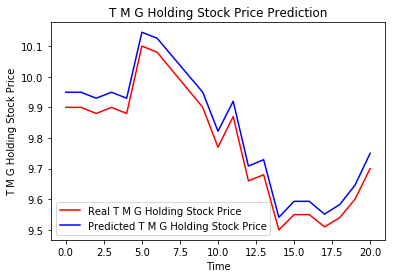

In [29]:
plt.plot(real_stock_price,color='red',label='Real T M G Holding Stock Price')
plt.plot(predicted_stock_prices,color='blue',label='Predicted T M G Holding Stock Price')
plt.title('T M G Holding Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('T M G Holding Stock Price')
plt.legend()
plt.show()

In [30]:
import math
from sklearn.metrics import mean_squared_error

In [31]:
rmse=math.sqrt(mean_squared_error(real_stock_price,predicted_stock_prices))
rmse

0.04721972754217781

In [32]:
mse=mean_squared_error(real_stock_price,predicted_stock_prices)
mse

0.002229702669157506